dang tai Phường Vĩnh Tuy, Hà Nội, Việt Nam
dang tai Phường Mai Động, Hà Nội, Việt Nam
dang tai Phường Vĩnh Hưng, Hà Nội, Việt Nam
dang tai Phường Thanh Lương, Hà Nội, Việt Nam
da tai ban do
da them speed va travel time
Da chuyen doi thanh dataframe.


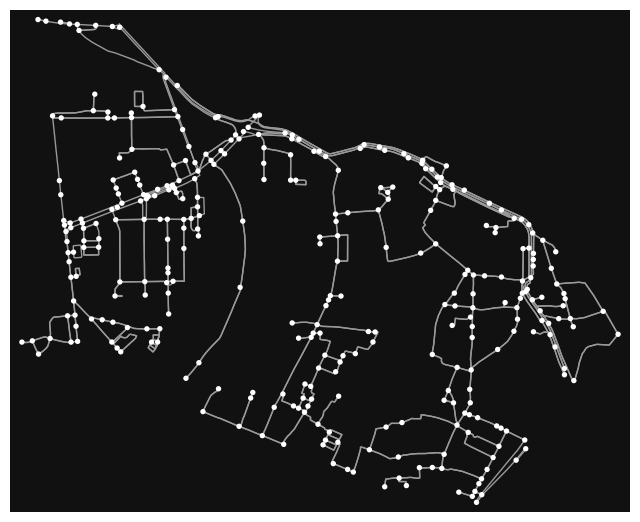

In [2]:
import matplotlib.pyplot as plt
import osmnx as ox
from sqlalchemy import create_engine, text
import networkx as nx

#sau sap nhap co 4 phuong
places_names =[
    "Phường Vĩnh Tuy, Hà Nội, Việt Nam",
    "Phường Mai Động, Hà Nội, Việt Nam",
    "Phường Vĩnh Hưng, Hà Nội, Việt Nam",
    "Phường Thanh Lương, Hà Nội, Việt Nam"
]

#gop do thi
graphs=[]
for place in places_names:
    print(f"dang tai {place}")
    G=ox.graph_from_place(place, network_type='drive')
    graphs.append(G)

G = graphs[0]
for graph in graphs[1:]:
    G = nx.compose(G, graph)

G = ox.project_graph(G)  # Chuyển sang hệ tọa độ chiếu (projected CRS)
G = ox.consolidate_intersections(G, tolerance=15)

print("da tai ban do")

# them speed va travel time lam trong so edge
G = ox.add_edge_speeds(G, fallback=30)
G = ox.add_edge_travel_times(G)

print("da them speed va travel time")

# 1. Chuyển đổi đồ thị thành GeoDataFrames
nodes, edges = ox.graph_to_gdfs(G)

print("Da chuyen doi thanh dataframe.")

ox.plot_graph(G)
plt.show()